## Project Intro: Intel Lab Data

This notebook contains information about data collected from 54 sensors deployed in the Intel Berkeley Research lab between February 28th and April 5th, 2004.

`Mica2Dot` sensors with weather boards collected timestamped topology information, along with humidity, temperature, light and voltage values once every 31 seconds.

Source: http://db.csail.mit.edu/labdata/labdata.html

## Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### Dataset #1: Sensor Data

In [3]:
sensor_data = pd.read_csv('data/data.txt', sep=" ", header=None)
sensor_data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [4]:
sensor_data.columns = ['date', 'time', 'epoch', 'mote_id', 
                       'temperature', 'humidity', 'light', 'voltage']
sensor_data.head()

,date,time,epoch,mote_id,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [ ]:
sensor_data.tail()

### Inspect sensor data

In [5]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313682 entries, 0 to 2313681
Data columns (total 8 columns):
date           object
time           object
epoch          int64
mote_id        float64
temperature    float64
humidity       float64
light          float64
voltage        float64
dtypes: float64(5), int64(1), object(2)
memory usage: 141.2+ MB


In [6]:
sensor_data[['temperature', 'humidity', 'light', 'voltage']].describe()

,temperature,humidity,light,voltage
count,2.312781e+06,2.312780e+06,2.219804e+06,2.313156e+06
mean,3.920700e+01,3.390814e+01,4.072110e+02,2.492552e+00
std,3.741923e+01,1.732152e+01,5.394276e+02,1.795743e-01
min,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,2.040980e+01,3.187760e+01,3.956000e+01,2.385220e+00
50%,2.243840e+01,3.928030e+01,1.582400e+02,2.527320e+00
75%,2.702480e+01,4.358550e+01,5.372800e+02,2.627960e+00
max,3.855680e+02,1.375120e+02,1.847360e+03,1.856000e+01


In [7]:
sensor_data[sensor_data.duplicated() == True].sum()

date           0.0
time           0.0
epoch          0.0
mote_id        0.0
temperature    0.0
humidity       0.0
light          0.0
voltage        0.0
dtype: float64

In [8]:
sensor_data.isna().sum()

date               0
time               0
epoch              0
mote_id          526
temperature      901
humidity         902
light          93878
voltage          526
dtype: int64

In [9]:
sensor_data.dropna(inplace=True)
sensor_data.isna().sum()

date           0
time           0
epoch          0
mote_id        0
temperature    0
humidity       0
light          0
voltage        0
dtype: int64

### Plot and inspect signals data

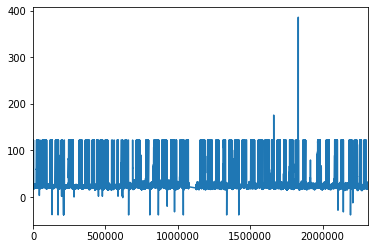

In [10]:
sensor_data['temperature'].plot()

### Remove time series anomaly

In [25]:
s_train_df = pd.DataFrame(sensor_data['date'] + ' ' + sensor_data['time'], columns=['datetime'])
s_train_df['datetime'] = pd.to_datetime(s_train_df['datetime'])
s_train_df['datetime'] = s_train_df['datetime'].values.astype('<M8[s]')
s_train_df['temperature'] = sensor_data['temperature']
s_train_df.set_index('datetime', inplace=True)
s_train_df.head()

,temperature
datetime,
2004-03-31 03:38:15,122.1530
2004-02-28 00:59:16,19.9884
2004-02-28 01:03:16,19.3024
2004-02-28 01:06:16,19.1652
2004-02-28 01:06:46,19.1750


In [26]:
s_train_df.describe()

,temperature
count,2.219803e+06
mean,3.923349e+01
std,3.742116e+01
min,-3.840000e+01
25%,2.045880e+01
50%,2.246780e+01
75%,2.697580e+01
max,3.855680e+02


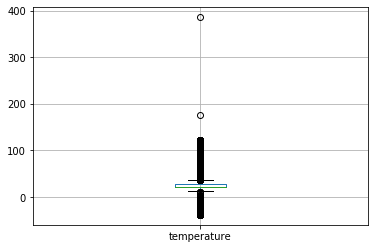

In [27]:
s_train_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129607990>]],
      dtype=object)

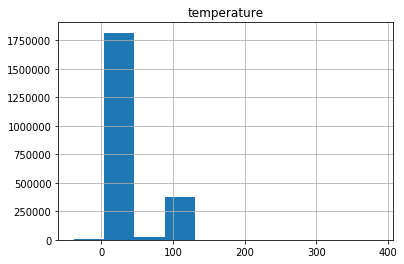

In [32]:
s_train_df.hist(bins=10)

In [30]:
s_train_df.loc[s_train_df['temperature'] > 40]

,temperature
datetime,
2004-03-31 03:38:15,122.153
2004-03-31 03:22:19,122.153
2004-03-31 03:26:15,122.153
2004-03-31 04:31:15,121.997
2004-03-31 04:35:02,121.977
...,...
2004-03-31 04:06:45,122.036
2004-03-31 04:07:51,122.153
2004-03-31 04:09:20,122.016


In [36]:
s_train_df = s_train_df[(s_train_df['temperature'] > 10) & (s_train_df['temperature'] <= 40)]
s_train_df.shape

(1811383, 1)

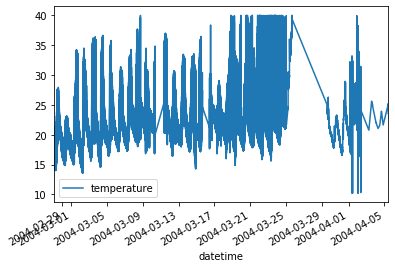

In [37]:
s_train_df.plot()

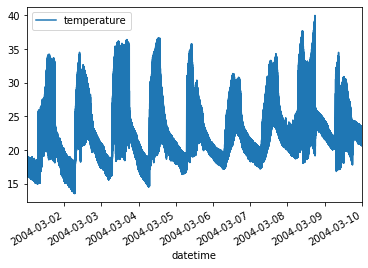

In [39]:
start_date = '2004-03-01'
end_date = '2004-03-10'

s_train_df = s_train_df[(s_train_df.index > start_date) & (s_train_df.index <= end_date)]
s_train_df.plot()

In [43]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

# train model
model = ARIMA(s_train_df, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1, 2313683, typ='levels')
print(yhat)

/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0          18.449803
1          18.437201
2          18.438331
3          18.450925
4          18.426734
             ...    
2313678    24.626515
2313679    24.626517
2313680    24.626520
2313681    24.626523
2313682    24.626525
Length: 2313683, dtype: float64


/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


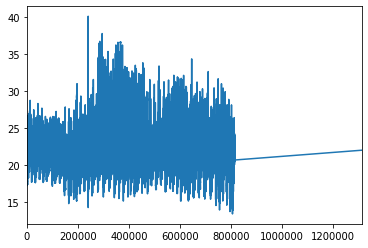

In [51]:
yhat[:1313682].plot()

In [54]:
yhat[1000000:]

1000000    21.139474
1000001    21.139476
1000002    21.139479
1000003    21.139482
1000004    21.139484
             ...    
2313678    24.626515
2313679    24.626517
2313680    24.626520
2313681    24.626523
2313682    24.626525
Length: 1313683, dtype: float64

### Dataset #2: Sensor Location

In [16]:
sensor_locs = pd.read_csv('data/mote_locs.txt', sep=" ", header=None)
sensor_locs.head()

,0,1,2
0,1,21.5,23
1,2,24.5,20
2,3,19.5,19
3,4,22.5,15
4,5,24.5,12


In [17]:
sensor_locs.columns = ['mote_id', 'x_coord', 'y_coord']
sensor_locs.head()

,mote_id,x_coord,y_coord
0,1,21.5,23
1,2,24.5,20
2,3,19.5,19
3,4,22.5,15
4,5,24.5,12


In [18]:
sensor_locs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
mote_id    54 non-null int64
x_coord    54 non-null float64
y_coord    54 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [19]:
sensor_locs['mote_id'] = sensor_locs['mote_id'].astype(float)
sensor_locs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
mote_id    54 non-null float64
x_coord    54 non-null float64
y_coord    54 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


### Inspect sensor location data

In [20]:
sensor_locs['mote_id'].nunique()

54

In [21]:
sensor_locs.isna().sum()

mote_id    0
x_coord    0
y_coord    0
dtype: int64

In [22]:
sensor_locs.duplicated().sum()

0

### Combine dataset #1 and #2

In [23]:
sensor_signals = sensor_data.merge(sensor_locs, how='left', left_on='mote_id', right_on='mote_id')
sensor_signals.head()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,x_coord,y_coord
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397,21.5,23.0
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964,21.5,23.0
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742,21.5,23.0
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742,21.5,23.0
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964,21.5,23.0


### Aggregate dataset by `mote_id`

In [24]:
agg_sensor_signals = sensor_signals.groupby('mote_id').mean()
agg_sensor_signals.drop('epoch', axis=1, inplace=True)
agg_sensor_signals.head()

,temperature,humidity,light,voltage,x_coord,y_coord
mote_id,,,,,,
1.0,35.882437,34.319280,156.575828,2.519643,21.5,23.0
2.0,40.201817,34.298739,212.159717,2.458436,24.5,20.0
3.0,33.716012,34.787920,146.052806,2.517967,19.5,19.0
4.0,45.464410,29.991159,155.491512,2.468170,22.5,15.0
6.0,27.561589,28.513638,453.114123,2.428337,19.5,12.0
